In [2]:
# sample from: https://www.youtube.com/watch?v=qHosBSw_71o
print ('Classification Metrics')

Classification Metrics


In [8]:
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets

# ds = pd.read_csv('pima-indians-diabetes.csv')
ds_cancer = datasets.load_breast_cancer()
ds = pd.DataFrame(data=ds_cancer.data, columns=ds_cancer.feature_names)
ds['class'] = ds_cancer.target

ds.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [22]:
from sklearn.model_selection import train_test_split
X = ds_cancer.data
y = ds_cancer.target

# X_train, X_test, y_train, y_test = train_test_split(ds.drop('class', axis=1), ds['class'], test_size=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))


398 171
398 171


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('after scalling')
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

after scalling
398 171
398 171


In [39]:
# Call the classifier with KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

result = accuracy_score(y_test, y_pred_knn)
print("Accuracy:",result)



Accuracy: 0.9590643274853801


In [40]:
# with DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred_dt = classifier.predict(X_test)

result = accuracy_score(y_test, y_pred_dt)
print("Accuracy:",result)


Accuracy: 0.9298245614035088


In [ ]:
# NOTE: If dataset is not balanced: Recommendation is not to see the accuracy, consider accuracy only when ds is balanced.

In [46]:
# Get the Log Loss with
from sklearn.metrics import log_loss

log_loss(y_test, y_pred_knn)
logg_loss = log_loss(y_test, y_pred_knn)
print("Log Loss with knn:",logg_loss)

log_loss(y_test, y_pred_dt)
logg_loss = log_loss(y_test, y_pred_dt)
print("Log Loss with dt :",logg_loss)


Log Loss with knn: 1.475471191367369
Log Loss with dt : 2.5293791852012038


In [50]:
# Create confusion metrics for knn
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

print('------------------------')

# Create confusion metrics for dt
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

# lean confusion metrics in youtube ref: https://www.youtube.com/watch?v=H2M3fT1njXQ&authuser=0



[[ 59   4]
 [  3 105]]
------------------------
[[ 58   5]
 [  7 101]]


In [58]:
# classification report
print('classification metrics on knn :\n')
print(classification_report(y_test, y_pred_knn))

print('========================================================')
print('classification metrics on dt :\n')
print(classification_report(y_test, y_pred_dt))


classification metrics on knn :

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

classification metrics on dt :

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        63
           1       0.95      0.94      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [60]:
# Area under ROC
from sklearn.metrics import roc_auc_score
knn_roc = roc_auc_score(y_test, y_pred_knn)
dt_roc  = roc_auc_score(y_test, y_pred_dt)

print('Area under ROC for knn:', knn_roc)
print('Area under ROC for dt:', dt_roc)



Area under ROC for knn: 0.9543650793650794
Area under ROC for dt: 0.9279100529100529


In [62]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)




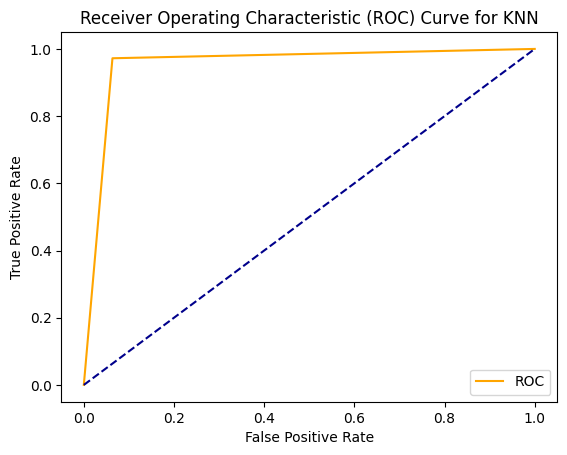

In [64]:
import matplotlib.pyplot as plt
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend()
plt.show()


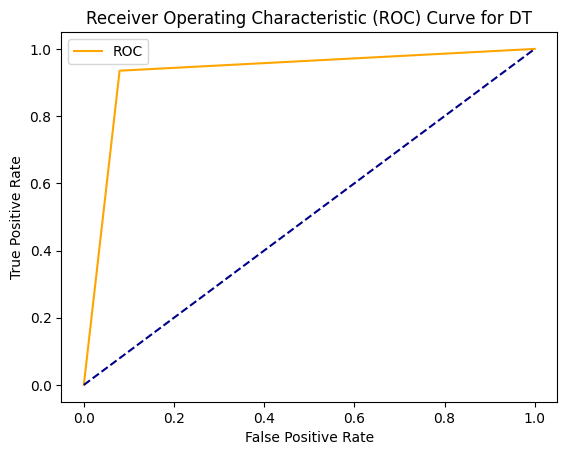

In [66]:
import matplotlib.pyplot as plt
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for DT')
plt.legend()
plt.show()
